# Visualize Secondary Partitions (Yeh HCP842, LC, BNA)

In [1]:
from glob import glob
import pandas as pd
import numpy as np
import colorcet as cc
import seaborn as sns
import matplotlib.pyplot as plt
import bct
from nilearn import surface, plotting, image, regions

/home/despoB/dlurie/anaconda3/envs/playpen/lib/python3.7/site-packages/nilearn-0.7.2.dev0-py3.7.egg/nilearn/datasets/__init__.py:90: FutureWarning: Fetchers from the nilearn.datasets module will be updated in version 0.9 to return python strings instead of bytes and Pandas dataframes instead of Numpy arrays.
  "Numpy arrays.", FutureWarning)


In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
sns.set_context('notebook')

In [3]:
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

In [4]:
def gen_surfaces(measure, idx_lh, idx_rh):
    measure_lh = measure[:210][::2] # Select even numbered ROIs
    measure_rh = measure[:210][1::2] # Select odd numbered ROIs

    measure_lh = np.insert(measure_lh, 0, [0,0], axis=0)
    measure_rh = np.insert(measure_rh, 0, [0,0], axis=0)

    measure_map_lh = measure_lh[idx_lh]
    measure_map_rh = measure_rh[idx_rh]
    
    return measure_map_lh, measure_map_rh

In [5]:
def plot_surfaces(lh_surf, map_lh, lh_bg, rh_surf, map_rh, rh_bg, plot_cmap, plot_vmin, plot_vmax):
    fig, ax = plt.subplots(2, 2, subplot_kw={'projection': '3d'}, figsize=(20,20))
    a = plotting.plot_surf_roi(lh_infl, map_lh, hemi='left', cmap=plot_cmap, view='lateral',
                             bg_map=lh_sulc, bg_on_data=True, darkness=0.6, vmin=plot_vmin, vmax=plot_vmax, threshold=1e-15, figure=fig, axes=ax[0][0])
    b = plotting.plot_surf_roi(rh_infl, map_rh, hemi='right', cmap=plot_cmap, view='lateral',
                             bg_map=rh_sulc, bg_on_data=True, darkness=0.6, vmin=plot_vmin, vmax=plot_vmax, threshold=1e-15, figure=fig, axes=ax[0][1])
    c = plotting.plot_surf_roi(lh_infl, map_lh, hemi='left', cmap=plot_cmap, view='medial',
                             bg_map=lh_sulc, bg_on_data=True, darkness=0.6, vmin=plot_vmin, vmax=plot_vmax, threshold=1e-15, figure=fig, axes=ax[1][0])
    d = plotting.plot_surf_roi(rh_infl, map_rh, hemi='right', cmap=plot_cmap, view='medial',
                             bg_map=rh_sulc, bg_on_data=True, darkness=0.6, vmin=plot_vmin, vmax=plot_vmax, threshold=1e-15, figure=fig, axes=ax[1][1])
    plt.tight_layout()

In [6]:
def plot_colorbar(data, cmap):
    plt.figure(figsize=(6, 1))
    img = plt.imshow([data], cmap=cmap)
    plt.gca().set_visible(False)
    cax = plt.axes([0.1, 0.2, 0.8, 0.6])
    plt.colorbar(orientation="horizontal", cax=cax)

### Visualize Maximally Representitive Parition

In [7]:
def prepare_communities_NCT(membership_list):
    n_communities = len(np.unique(membership_list))
    color_pallette = sns.color_palette("tab20", n_communities).as_hex()
    module_colors = np.empty(246, dtype='object')
    for mod_id in range(1, n_communities+1):
        module_colors[membership_list == mod_id] = color_pallette[mod_id-1]
    return module_colors, color_pallette

In [8]:
def plot_connectograph(corr_mat, module_colors, cmap='RdBu_r', vmin=-1, vmax=1, center=None):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,5))
    ms = sns.heatmap(corr_mat, xticklabels=False, yticklabels=False,
               vmax=vmax, vmin=vmin, cmap=cmap, ax=ax1, center=center)
    #plt.colorbar(ms, ax=ax1)
    plotting.plot_connectome(corr_mat, coord_list, node_size=50, edge_cmap='RdBu_r',
                             node_color=list(module_colors), edge_threshold='99.999%', axes=ax2)

In [31]:
atlas_lh = surface.load_surf_data('/home/despoB/dlurie/Data/reference/Brainnetome/BNA/BN_Atlas_freesurfer/fsaverage/label/lh.BN_Atlas.annot')
atlas_rh = surface.load_surf_data('/home/despoB/dlurie/Data/reference/Brainnetome/BNA/BN_Atlas_freesurfer/fsaverage/label/rh.BN_Atlas.annot')

In [32]:
lh_pial = surface.load_surf_mesh('/home/despoB/dlurie/Data/reference/Brainnetome/BNA/BN_Atlas_freesurfer/fsaverage/surf/lh.pial')
rh_pial = surface.load_surf_mesh('/home/despoB/dlurie/Data/reference/Brainnetome/BNA/BN_Atlas_freesurfer/fsaverage/surf/rh.pial')
lh_infl = surface.load_surf_mesh('/home/despoB/dlurie/Data/reference/Brainnetome/BNA/BN_Atlas_freesurfer/fsaverage/surf/lh.inflated')
rh_infl = surface.load_surf_mesh('/home/despoB/dlurie/Data/reference/Brainnetome/BNA/BN_Atlas_freesurfer/fsaverage/surf/rh.inflated')

In [33]:
lh_curv = surface.load_surf_data('/home/despoB/dlurie/Data/CBIG/stable_projects/brain_parcellation/Schaefer2018_LocalGlobal/Parcellations/FreeSurfer5.3/fsaverage/surf/lh.curv')
rh_curv = surface.load_surf_data('/home/despoB/dlurie/Data/CBIG/stable_projects/brain_parcellation/Schaefer2018_LocalGlobal/Parcellations/FreeSurfer5.3/fsaverage/surf/rh.curv')

In [34]:
lh_sulc = surface.load_surf_data('/home/despoB/dlurie/Data/CBIG/stable_projects/brain_parcellation/Schaefer2018_LocalGlobal/Parcellations/FreeSurfer5.3/fsaverage/surf/lh.sulc')
rh_sulc = surface.load_surf_data('/home/despoB/dlurie/Data/CBIG/stable_projects/brain_parcellation/Schaefer2018_LocalGlobal/Parcellations/FreeSurfer5.3/fsaverage/surf/rh.sulc')

In [35]:
u_lh, idx_lh = np.unique(atlas_lh, return_inverse=True)
u_rh, idx_rh = np.unique(atlas_rh, return_inverse=True)

In [62]:
BNA_4D = image.load_img('/home/despoB/dlurie/Projects/timescale_hierarchy/data/resources/BNA-maxprob-thr25-1mm_4D.nii.gz')

In [71]:
coord_list = np.loadtxt('/home/despoB/dlurie/Projects/timescale_hierarchy/data/resources/BNA-maxprob-thr25-1mm_coords.txt')

### Gamma = 0.6

In [40]:
sns.set_style('ticks')

In [42]:
node_memberships_func = np.loadtxt('/home/despo/dlurie/Projects/timescale_hierarchy/results/structural_connectivity/Yeh-HCP842_BNA_log_count_mat_Louvain/gamma_0.6_GraphPartition.txt')

In [43]:
colors_func, pallette_func = prepare_communities_NCT(node_memberships_func)

In [44]:
reordered_mat_func = np.loadtxt('/home/despo/dlurie/Projects/timescale_hierarchy/results/structural_connectivity/Yeh-HCP842_BNA_log_count_mat_Louvain/gamma_0.6_ReorderedMatrix.txt').reshape(246,246)

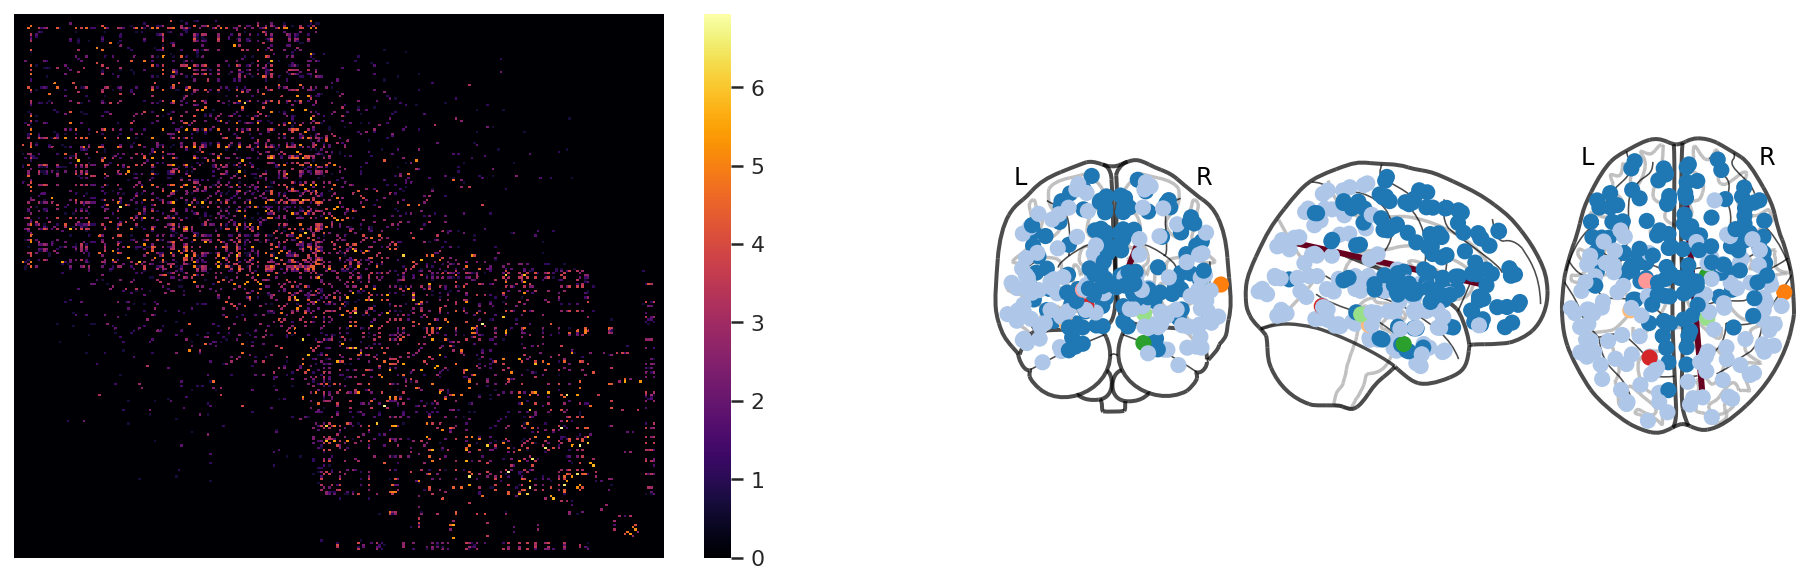

In [45]:
plot_connectograph(reordered_mat_func, colors_func, vmin=0, vmax=None, cmap='inferno')

In [46]:
len(np.unique(node_memberships_func))

8

In [47]:
np.unique(node_memberships_func, return_counts=True)

(array([1., 2., 3., 4., 5., 6., 7., 8.]),
 array([127, 113,   1,   1,   1,   1,   1,   1]))

Six communities include only a single region. We will set these all to the same value and consider them as unassigned.

In [48]:
node_memberships_func_fix = node_memberships_func.copy()

In [49]:
node_memberships_func_fix[node_memberships_func_fix > 2] = 3

In [50]:
np.unique(node_memberships_func_fix)

array([1., 2., 3.])

In [51]:
from matplotlib.colors import ListedColormap

In [52]:
c10 = sns.palettes.color_palette(palette="colorblind", n_colors=10)

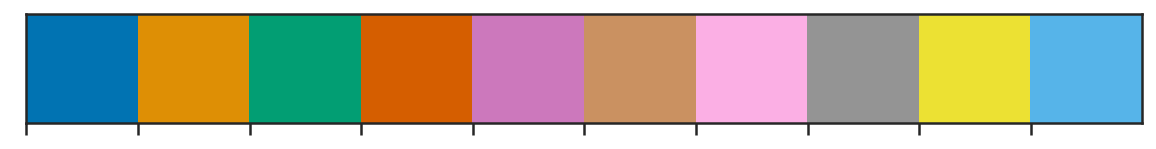

In [53]:
sns.palplot(c10)

In [23]:
sevenup = c10[7:]

In [24]:
sevenup.reverse()

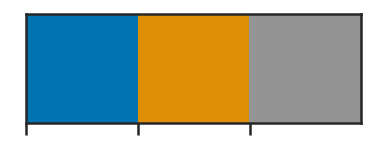

In [54]:
sns.palplot(c10[0:2]+[c10[7]])

In [55]:
len(c10[0:2]+[c10[7]])

3

In [57]:
c3 = ListedColormap(c10[0:2]+[c10[7]], name='c3')

In [64]:
part_img = regions.signals_to_img_maps(node_memberships_func_fix, BNA_4D)

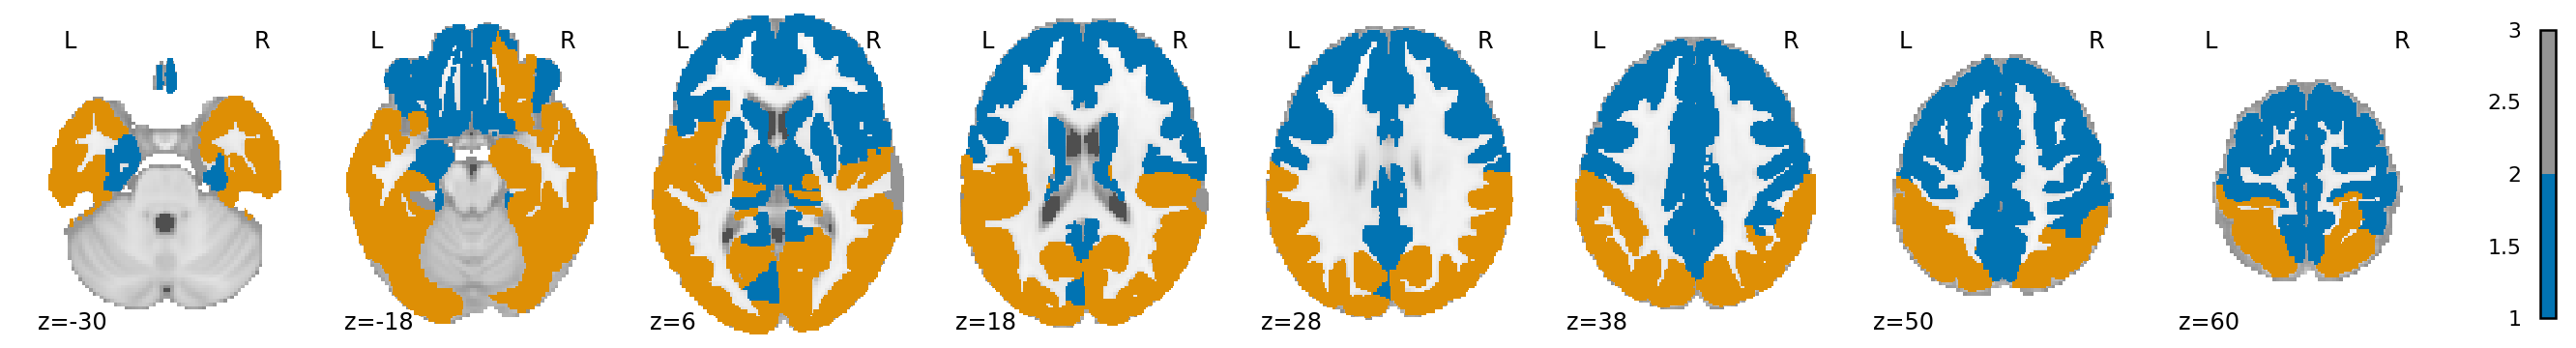

In [65]:
f = plotting.plot_roi(part_img, display_mode='z', cut_coords=[-30, -18, 6, 18, 28, 38, 50, 60],cmap=c3, vmin=1, threshold=0.1, alpha=1, colorbar=True)

In [60]:
part_map_lh, part_map_rh = gen_surfaces(node_memberships_func_fix, idx_lh, idx_rh)

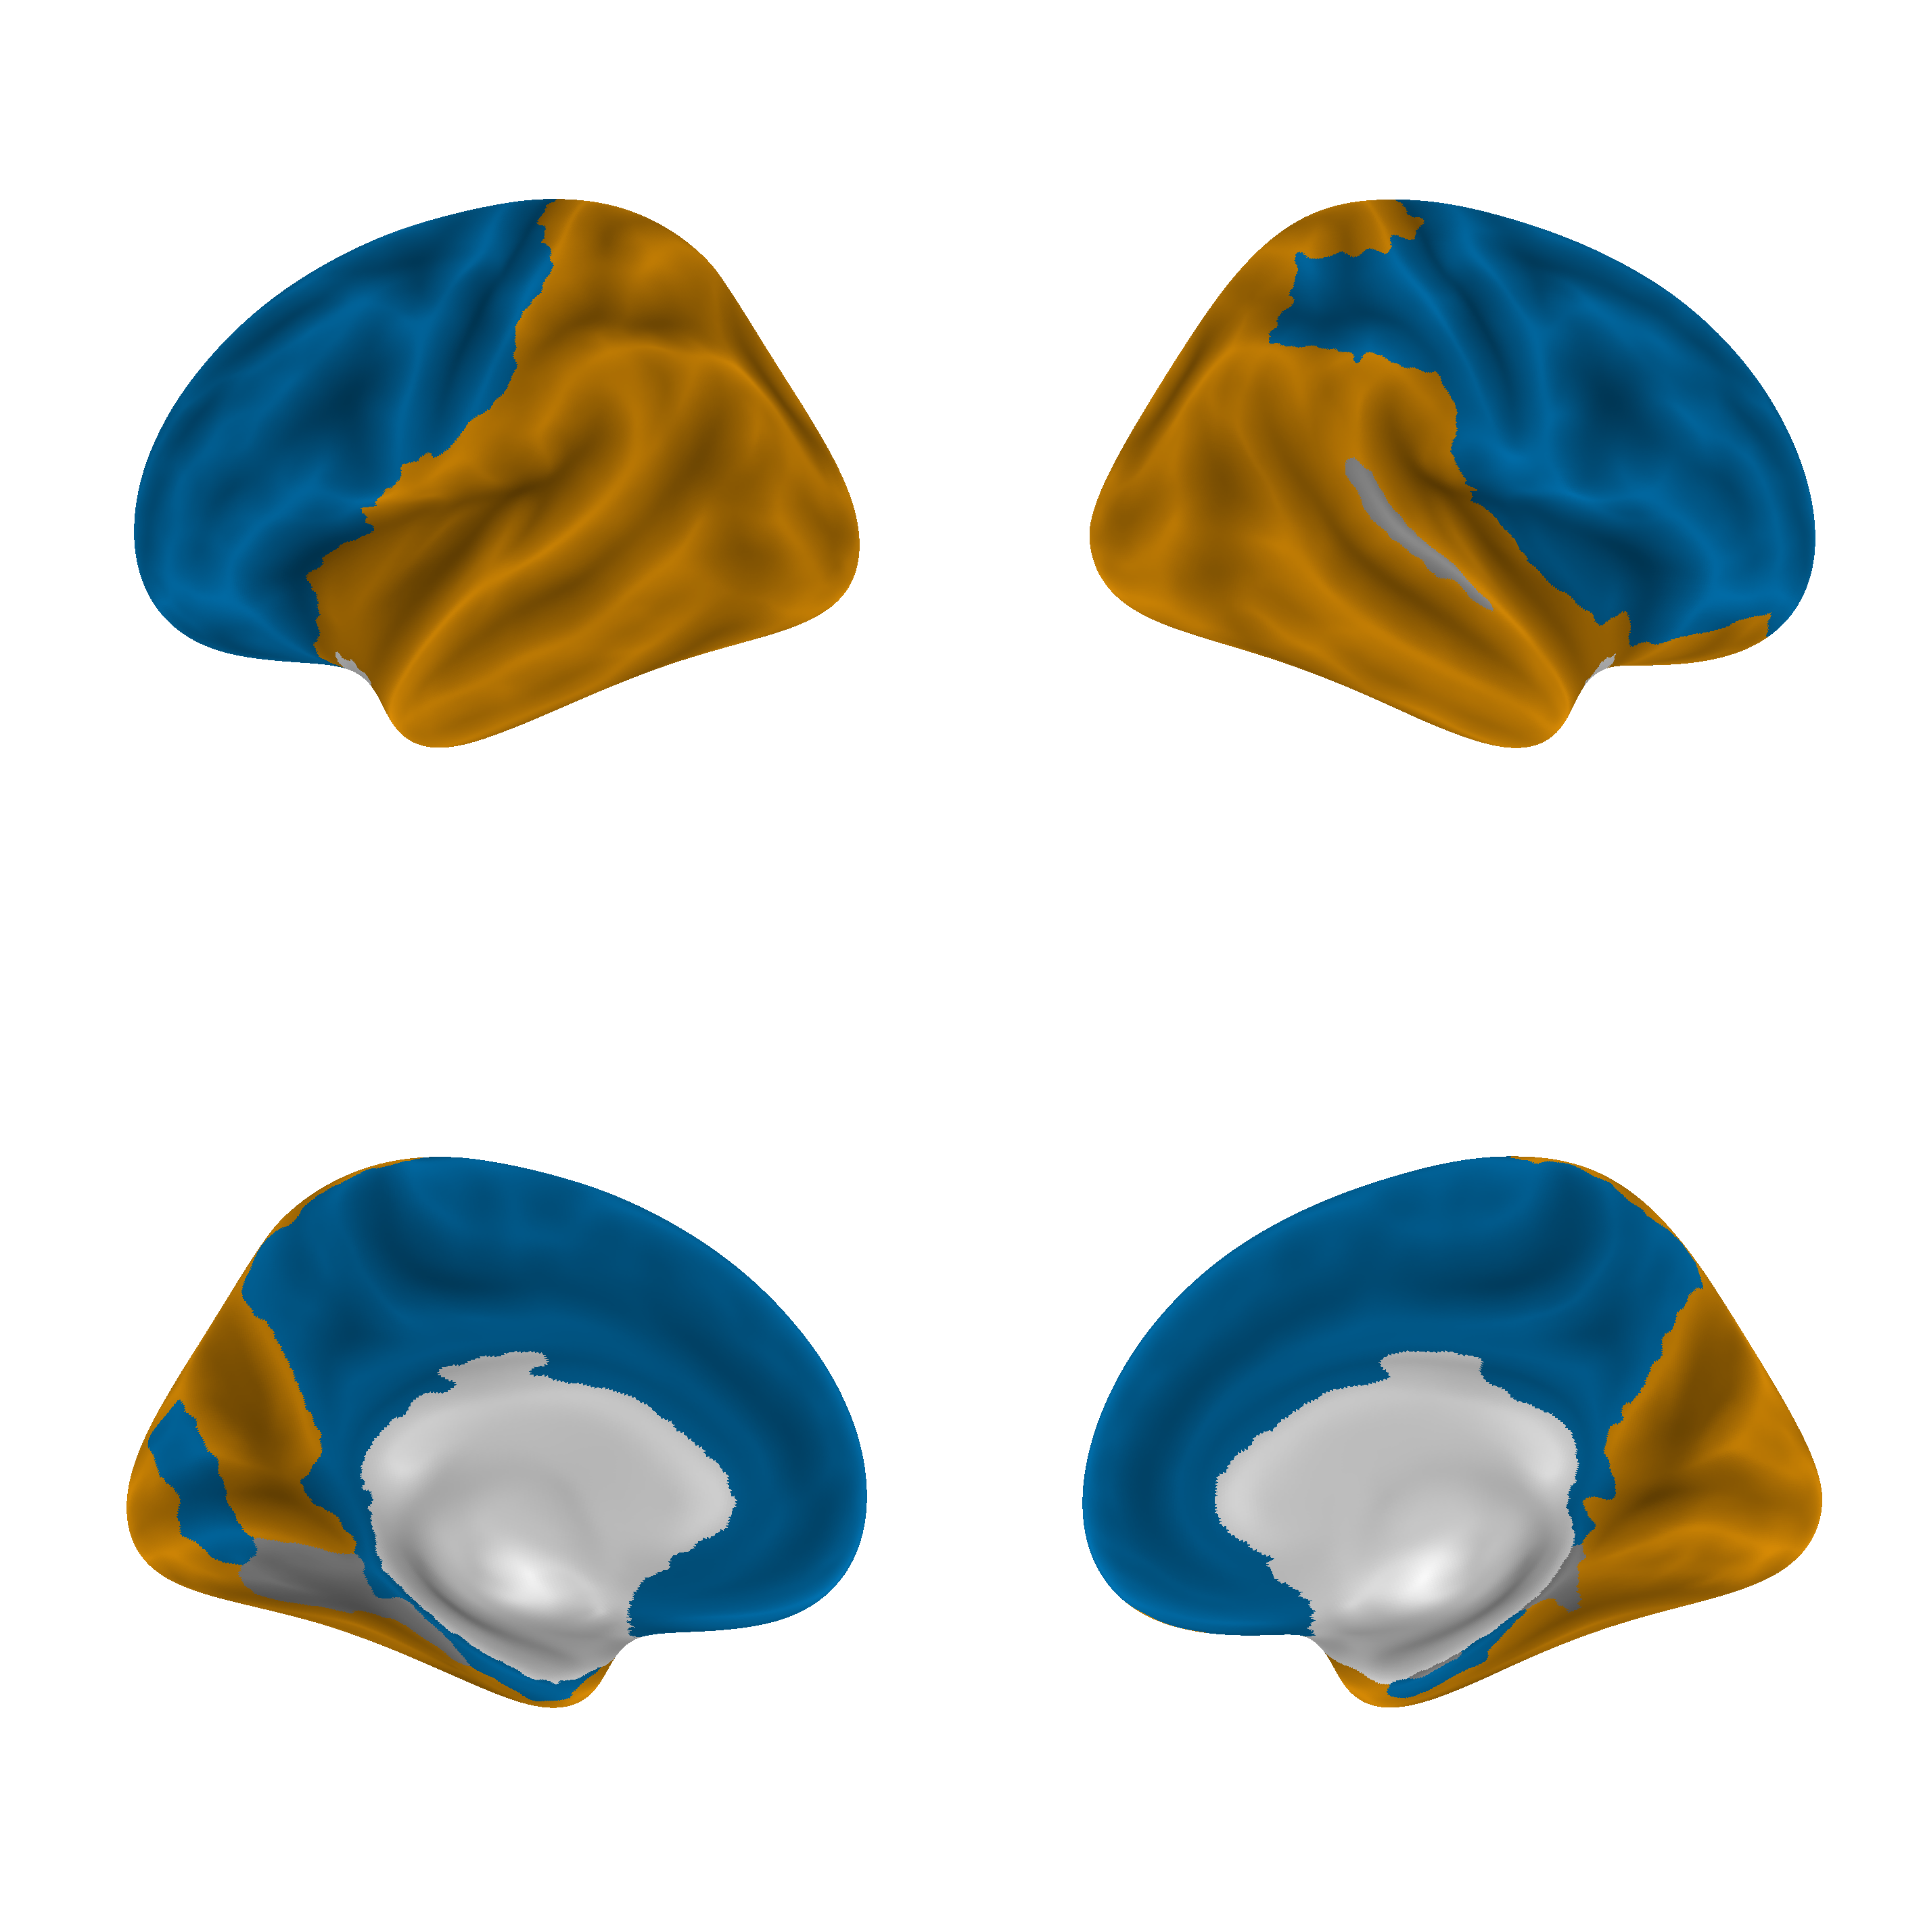

In [61]:
plot_surfaces(lh_infl, part_map_lh, lh_sulc, rh_infl, part_map_rh, rh_sulc, c3, np.min(node_memberships_func_fix), np.max(node_memberships_func_fix))

### Gamma = 2.8

In [66]:
node_memberships_func = np.loadtxt('/home/despo/dlurie/Projects/timescale_hierarchy/results/structural_connectivity/Yeh-HCP842_BNA_log_count_mat_Louvain/gamma_2.8_GraphPartition.txt')

In [67]:
colors_func, pallette_func = prepare_communities_NCT(node_memberships_func)

In [68]:
reordered_mat_func = np.loadtxt('/home/despo/dlurie/Projects/timescale_hierarchy/results/structural_connectivity/Yeh-HCP842_BNA_log_count_mat_Louvain/gamma_2.8_ReorderedMatrix.txt').reshape(246,246)

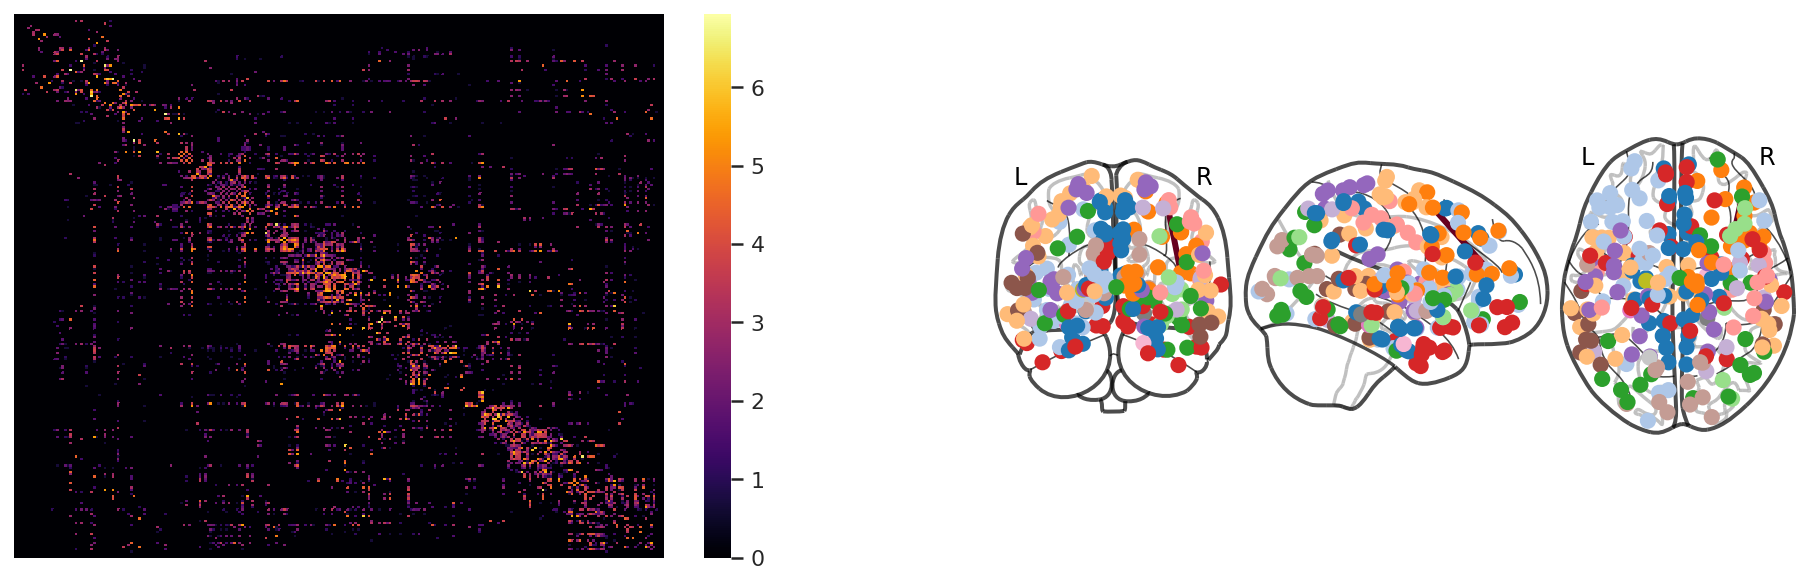

In [73]:
plot_connectograph(reordered_mat_func, colors_func, vmin=0, vmax=None, cmap='inferno')

In [74]:
len(np.unique(node_memberships_func))

17

In [75]:
np.unique(node_memberships_func, return_counts=True)

(array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
        14., 15., 16., 17.]),
 array([37, 34, 21, 32, 20,  7, 28, 11, 21,  7, 10, 13,  1,  1,  1,  1,  1]))

Six communities include only a single region. We will set these all to the same value and consider them as unassigned.

In [76]:
node_memberships_func_fix = node_memberships_func.copy()

In [77]:
node_memberships_func_fix[node_memberships_func_fix > 12] = 13

In [78]:
np.unique(node_memberships_func_fix)

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.])

In [20]:
from matplotlib.colors import ListedColormap

In [79]:
c20 = sns.palettes.color_palette(palette="tab20", n_colors=20)

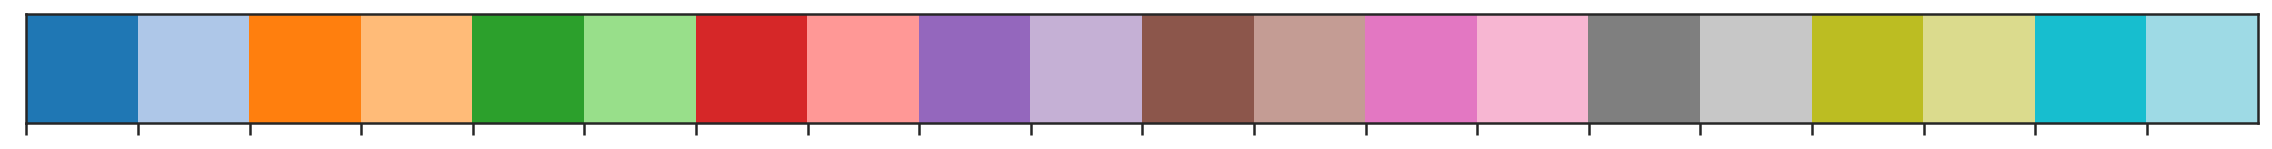

In [80]:
sns.palplot(c20)

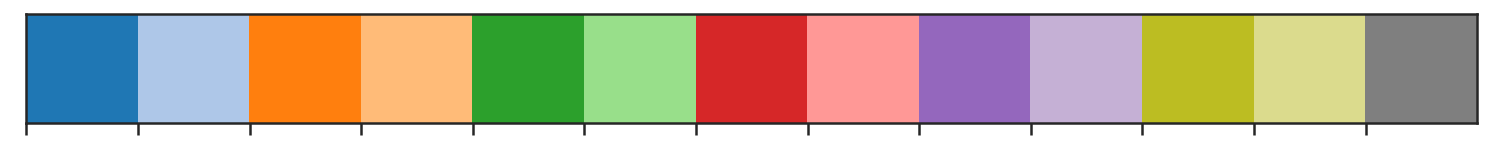

In [84]:
sns.palplot(c20[0:10]+c20[-4:-2]+[c20[-6]])

In [85]:
len(c20[0:10]+c20[-4:-2]+[c20[-6]])

13

In [86]:
c13 = ListedColormap(c20[0:10]+c20[-4:-2]+[c20[-6]], name='c13')

In [87]:
part_img = regions.signals_to_img_maps(node_memberships_func_fix, BNA_4D)

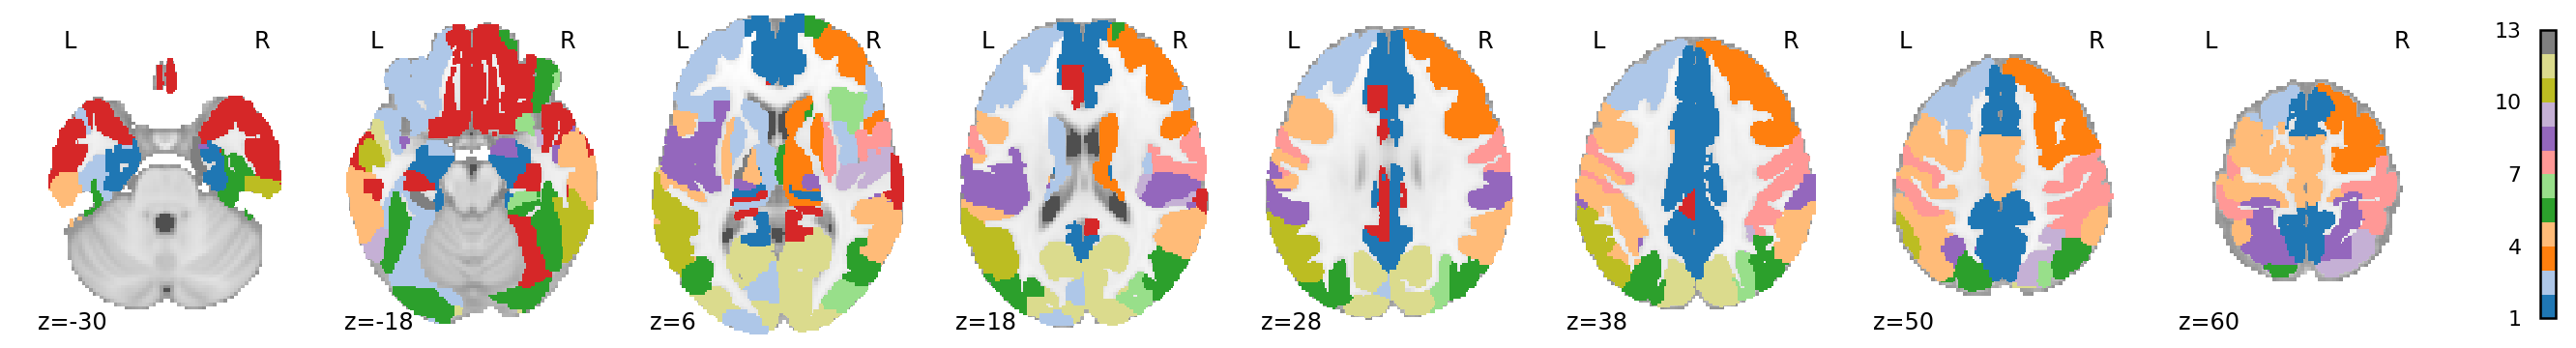

In [89]:
f = plotting.plot_roi(part_img, display_mode='z', cut_coords=[-30, -18, 6, 18, 28, 38, 50, 60], cmap=c13, vmin=1, threshold=0.1, alpha=1, colorbar=True)

In [90]:
part_map_lh, part_map_rh = gen_surfaces(node_memberships_func_fix, idx_lh, idx_rh)

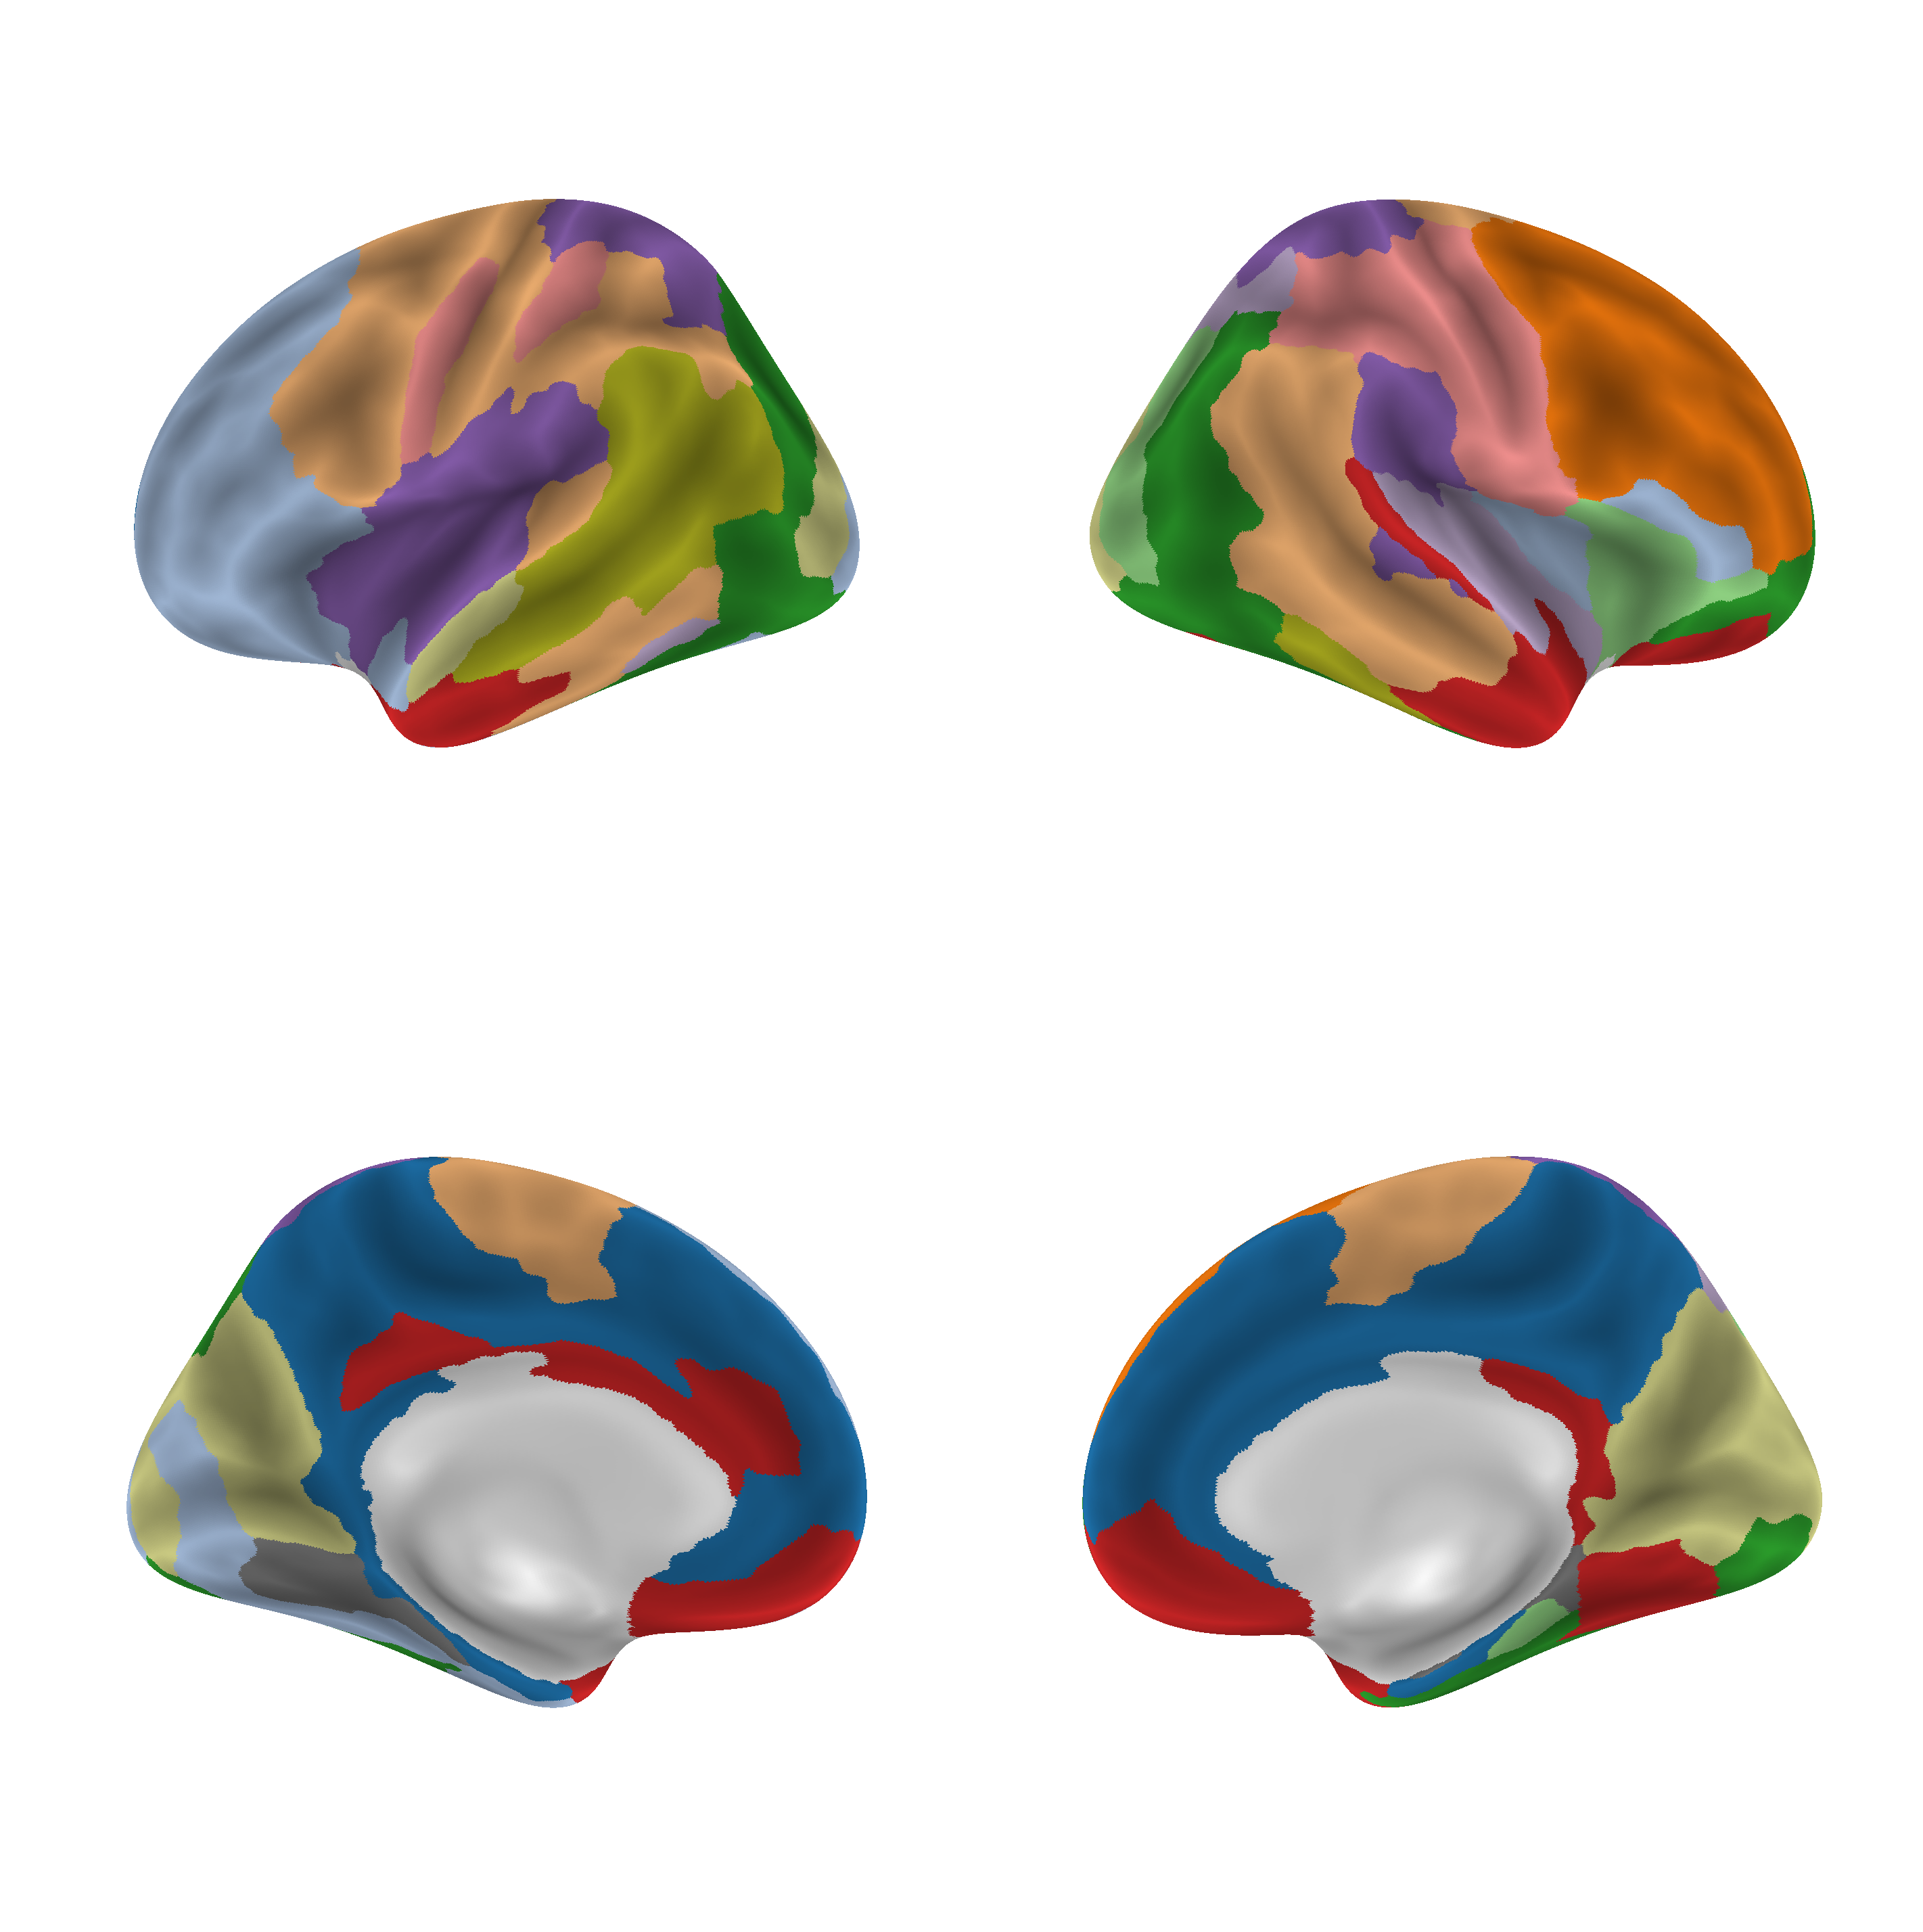

In [91]:
plot_surfaces(lh_infl, part_map_lh, lh_sulc, rh_infl, part_map_rh, rh_sulc, c13, np.min(node_memberships_func_fix), np.max(node_memberships_func_fix))

### Gamma = 3.3

In [92]:
node_memberships_func = np.loadtxt('/home/despo/dlurie/Projects/timescale_hierarchy/results/structural_connectivity/Yeh-HCP842_BNA_log_count_mat_Louvain/gamma_3.3_GraphPartition.txt')

In [93]:
colors_func, pallette_func = prepare_communities_NCT(node_memberships_func)

In [94]:
reordered_mat_func = np.loadtxt('/home/despo/dlurie/Projects/timescale_hierarchy/results/structural_connectivity/Yeh-HCP842_BNA_log_count_mat_Louvain/gamma_3.3_ReorderedMatrix.txt').reshape(246,246)

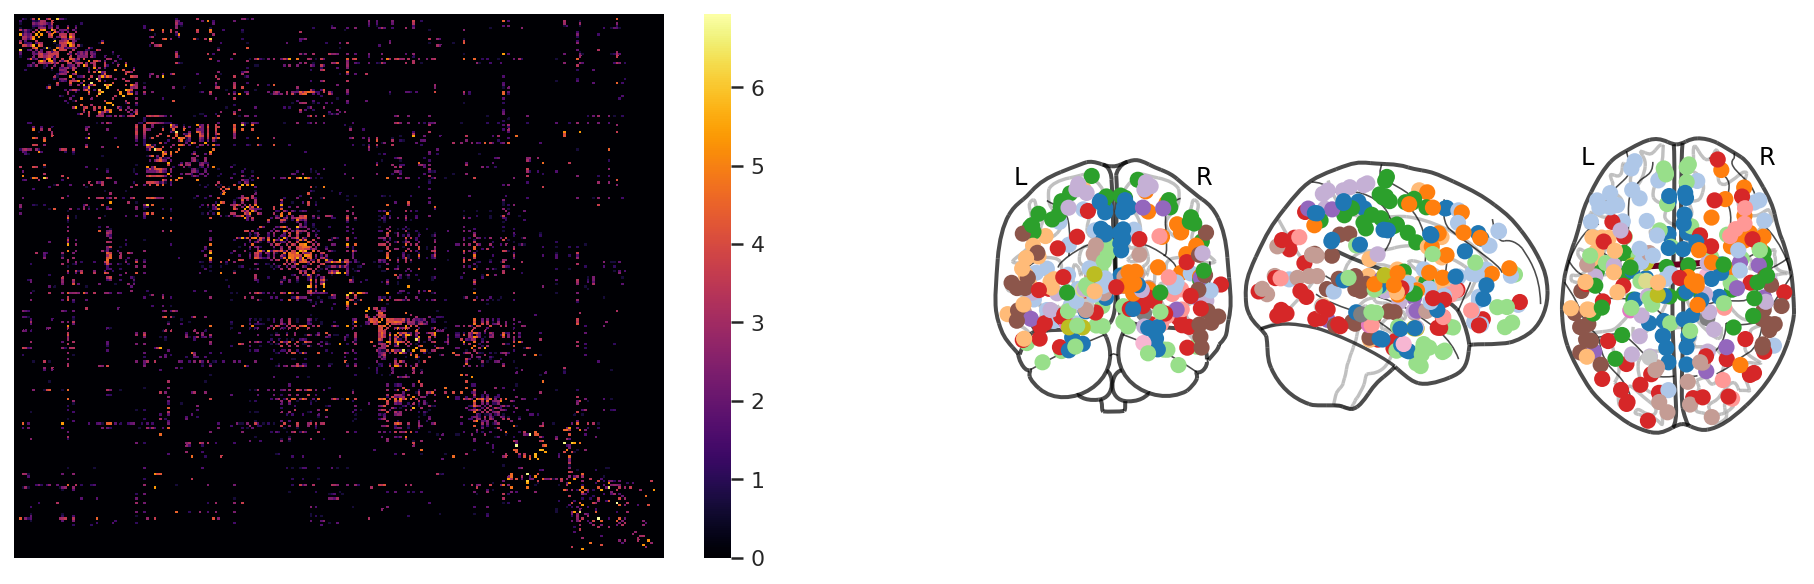

In [95]:
plot_connectograph(reordered_mat_func, colors_func, vmin=0, vmax=None, cmap='inferno')

In [96]:
len(np.unique(node_memberships_func))

18

In [97]:
np.unique(node_memberships_func, return_counts=True)

(array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
        14., 15., 16., 17., 18.]),
 array([32, 27, 20, 16, 25, 26, 34,  7,  7, 15, 18, 11,  1,  1,  1,  1,  3,
         1]))

Six communities include only a single region. We will set these all to the same value and consider them as unassigned.

In [98]:
node_memberships_func_fix = node_memberships_func.copy()

In [99]:
node_memberships_func_fix[node_memberships_func_fix == 17] = 13

In [100]:
node_memberships_func_fix[node_memberships_func_fix > 13] = 14

In [101]:
np.unique(node_memberships_func_fix)

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14.])

In [102]:
from matplotlib.colors import ListedColormap

In [103]:
c20 = sns.palettes.color_palette(palette="tab20", n_colors=20)

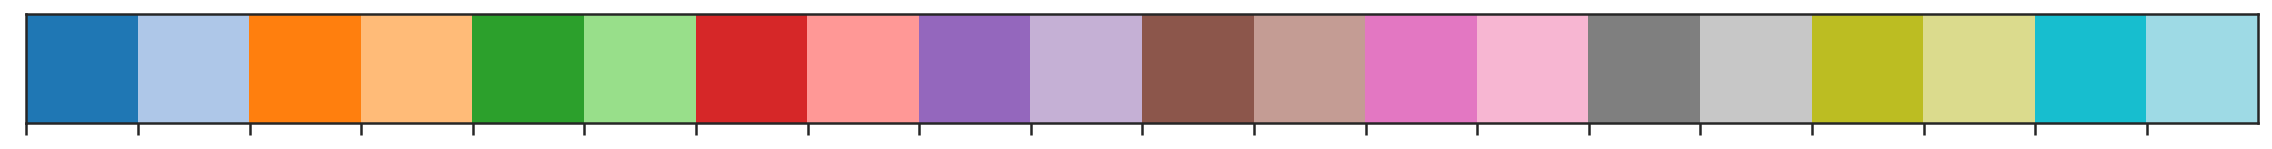

In [104]:
sns.palplot(c20)

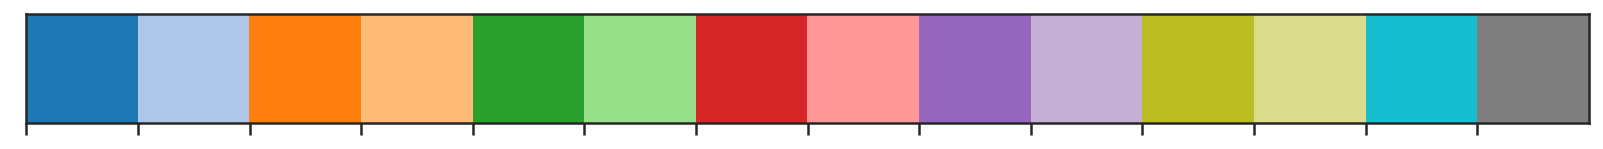

In [107]:
sns.palplot(c20[0:10]+c20[-4:-1]+[c20[-6]])

In [108]:
len(c20[0:10]+c20[-4:-1]+[c20[-6]])

14

In [109]:
c14 = ListedColormap(c20[0:10]+c20[-4:-1]+[c20[-6]], name='c14')

In [110]:
part_img = regions.signals_to_img_maps(node_memberships_func_fix, BNA_4D)

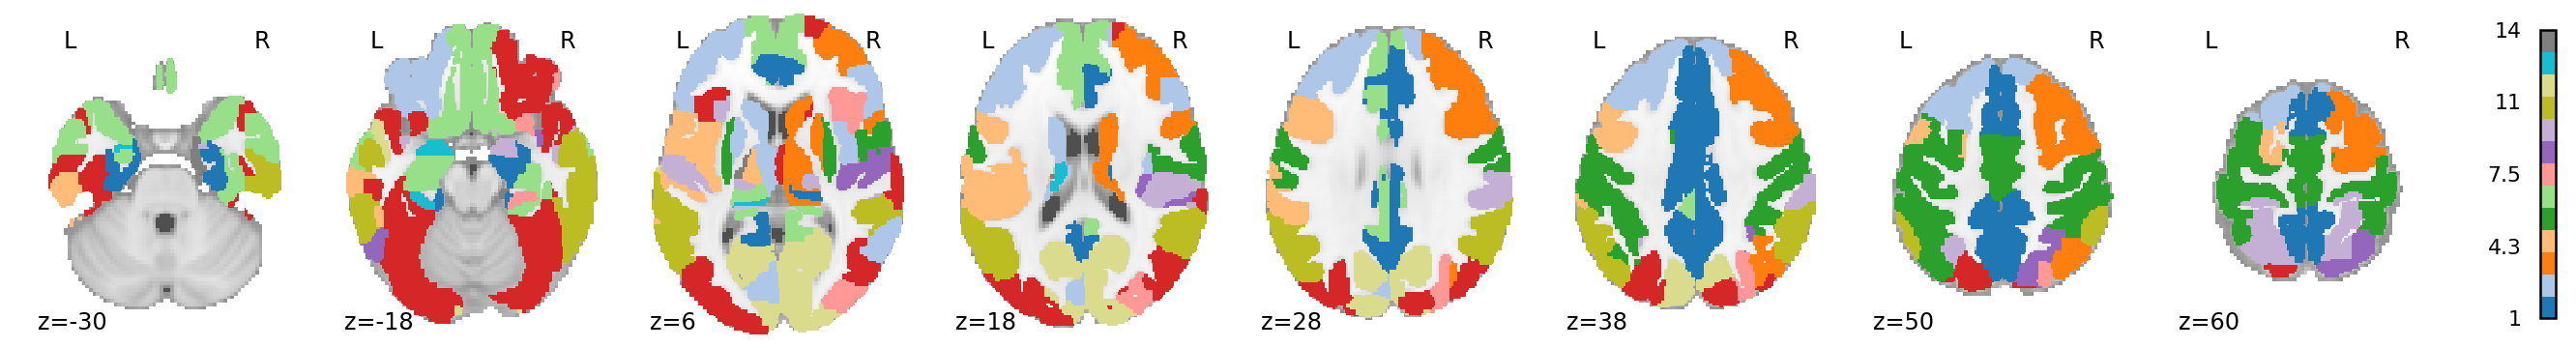

In [112]:
f = plotting.plot_roi(part_img, display_mode='z', cut_coords=[-30, -18, 6, 18, 28, 38, 50, 60], cmap=c14, vmin=1, threshold=0.1, alpha=1, colorbar=True)

In [113]:
part_map_lh, part_map_rh = gen_surfaces(node_memberships_func_fix, idx_lh, idx_rh)

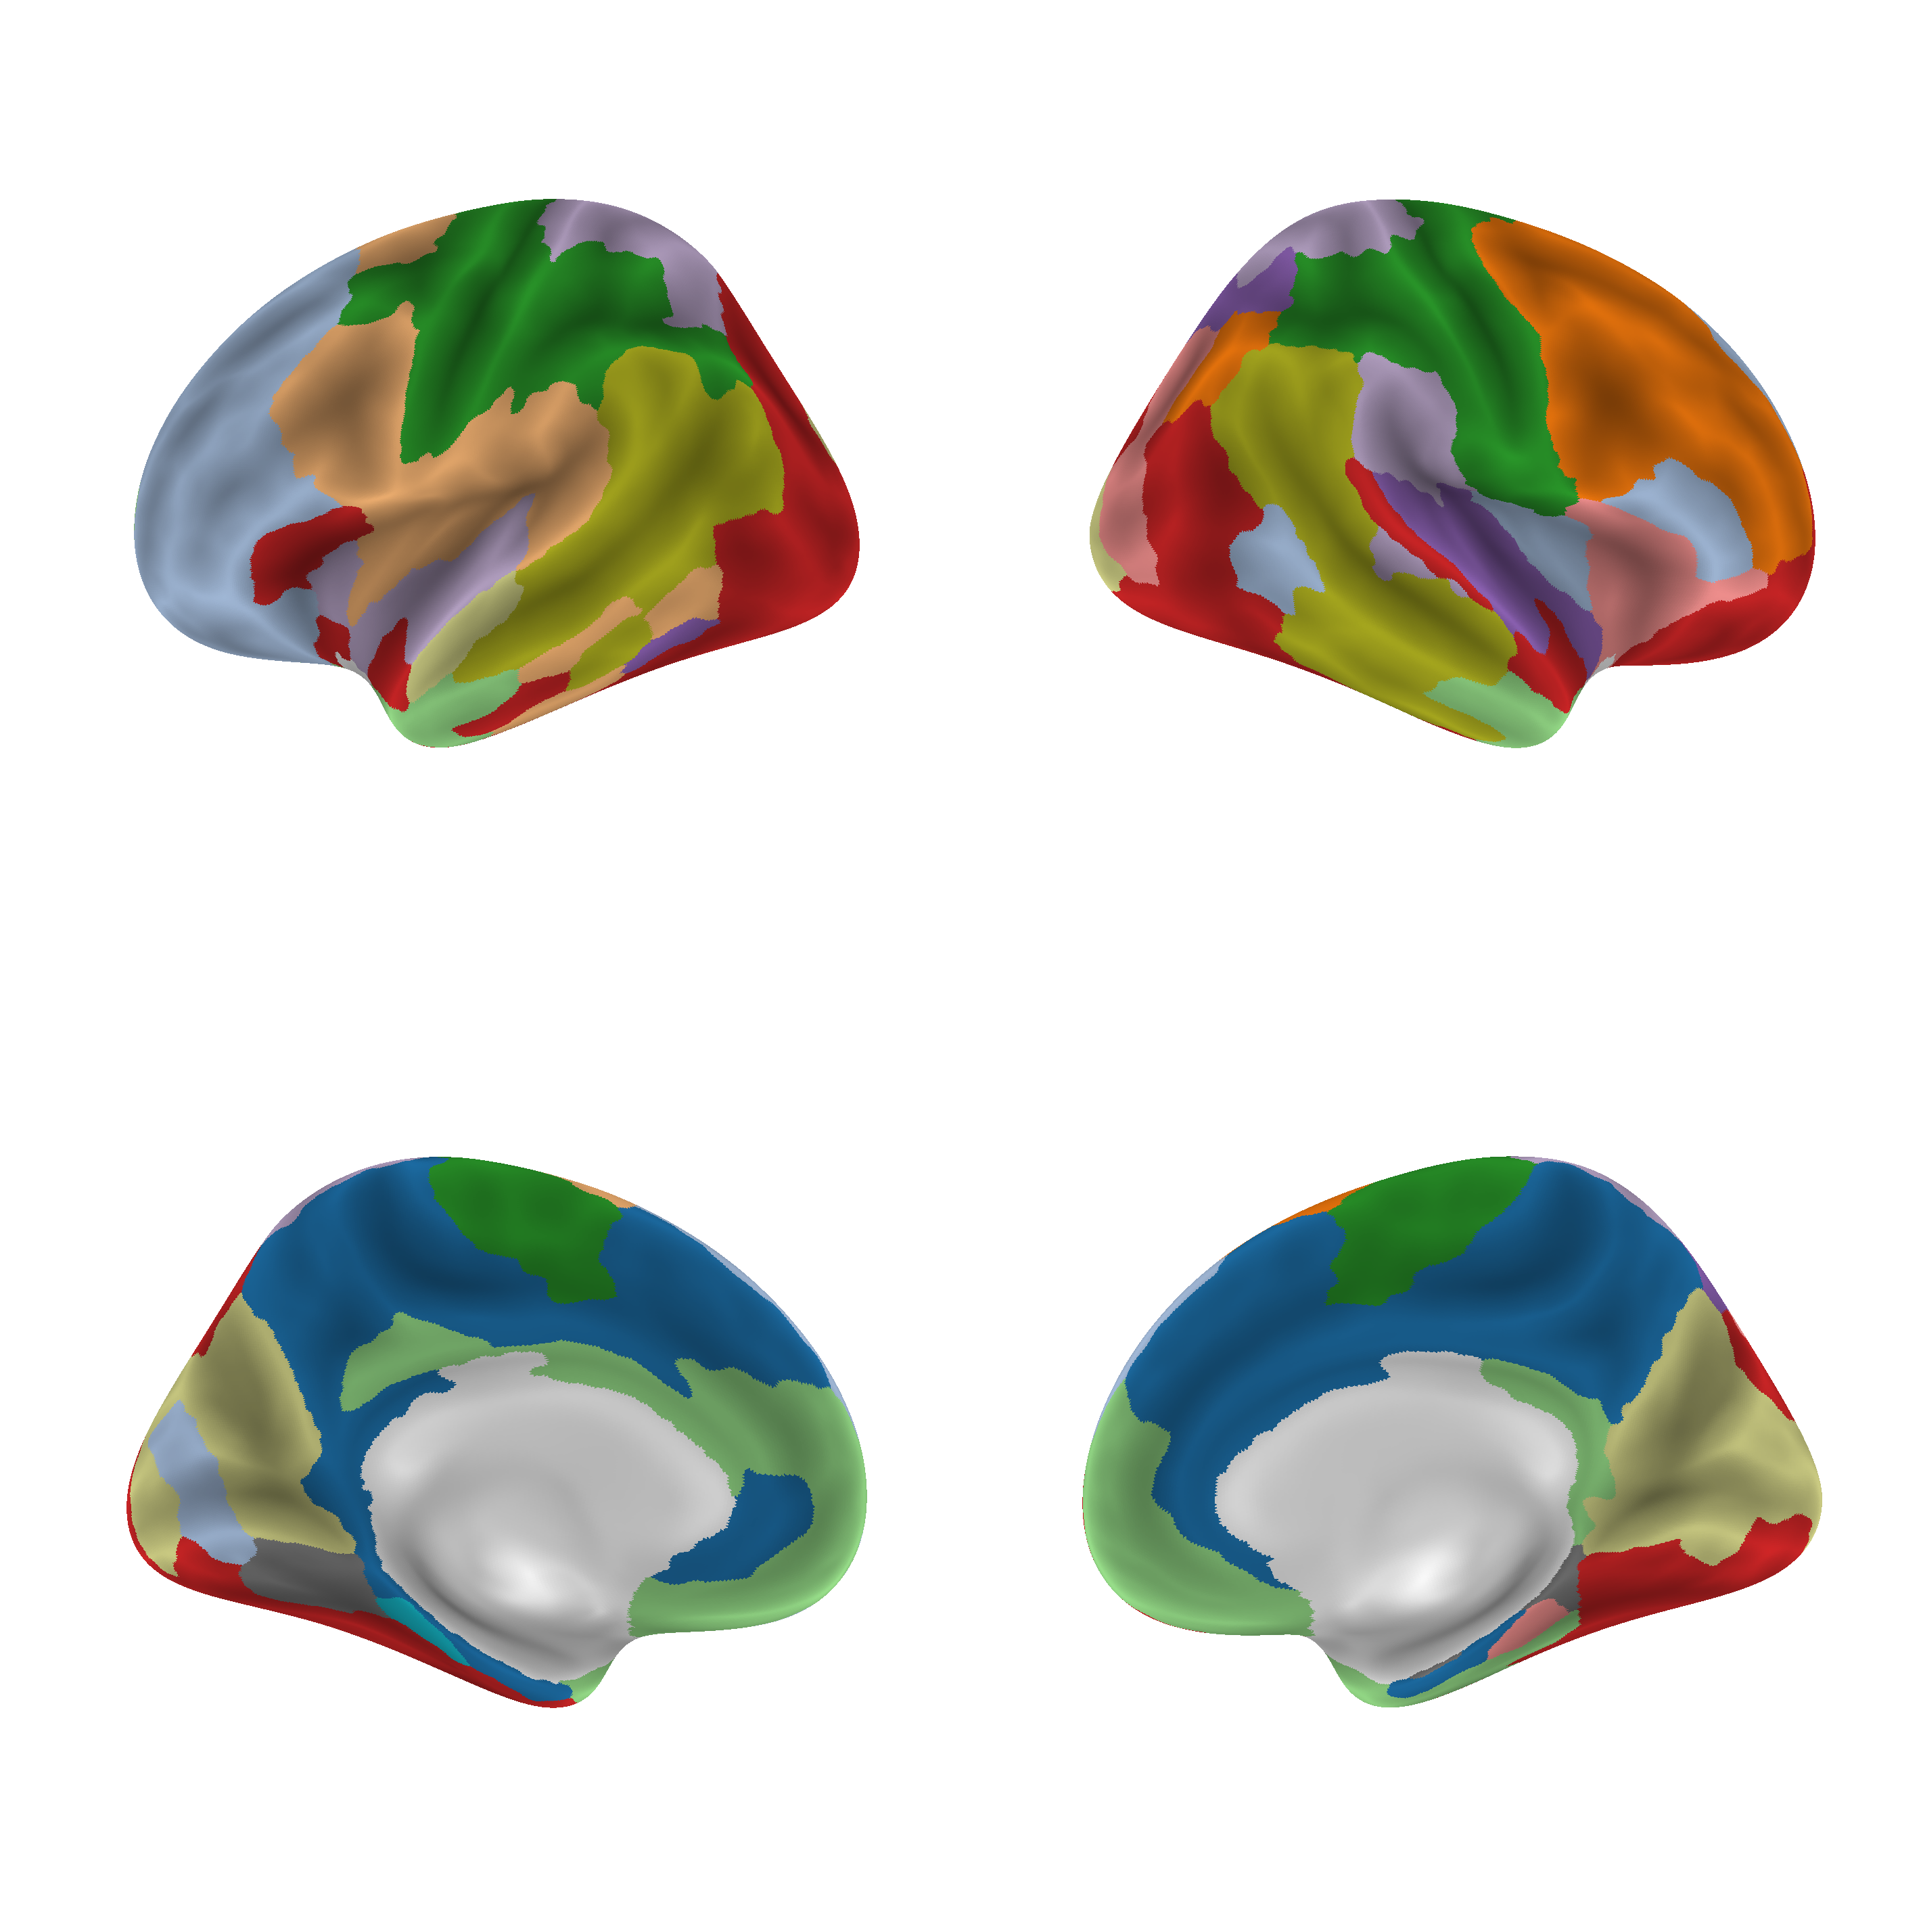

In [114]:
plot_surfaces(lh_infl, part_map_lh, lh_sulc, rh_infl, part_map_rh, rh_sulc, c14, np.min(node_memberships_func_fix), np.max(node_memberships_func_fix))